# 와인 감별사 : 와인의 Quality를 분류하는 Classifier 만들기

## 1. 과제 설명
이번 과제에서는 케라스(Keras)를 활용하여, 와인의 품질을 분류하는 인공신경망 분류기를 만들어 볼 것입니다.
케라스는 Tensorflow, Theano 등의 딥 러닝 라이브러리 위에서 동작하는 오픈 소스 라이브러리로, 보다 쉬운 API를 제공함으로써 모델 설계 및 학습, 테스트가 간단하다는 장점이 있습니다. 

### 1.1 케라스 설치를 위한 필수 라이브러리
케라스를 설치하기 전에 먼저 필수적으로 설치해야 할 것들이 있습니다.
* Anaconda : Python 3.x 버전, Numpy, Pandas, SciPy, sklearn 등 필수 라이브러리들이 포함된 통합 배포 팩
<br> 아나콘다 설치 : https://www.anaconda.com/distribution/#download-section
* Tensorflow : Google에서 개발한 오픈 소스 딥 러닝 라이브러리. <b>설치된 Python 버전과 호환되는 것으로 설치할것!</b>
<br> 텐서플로우 설치 : https://www.tensorflow.org/install/pip
<br> * CPU 버전을 설치할 것을 권장. 

### 1.2 케라스 설치
위 라이브러리들을 설치한 후, 케라스를 설치합니다.
* https://keras.io/#installation

### 1.3 케라스 설치 확인
케라스가 올바르게 설치되었는지 확인하기 위해, 케라스를 Import한 뒤 버전을 출력해봅니다.


In [1]:
import keras

keras.__version__

Using TensorFlow backend.


'2.2.4'

위와 같이 케라스의 버전이 출력되면 정상입니다. (출력되는 버전은 위 예시와 다를 수도 있음)<br> 나중에 신경망을 만들기 위한 클래스들도 함께 Import 합시다.

In [2]:
from keras import Sequential
from keras.layers import Dense, Activation
from keras.layers.core import Dropout

---
## 2. Data Set 설명
 본 과제에서 사용할 데이터 셋은 UCI에서 제공되는 Wine Quality Data Set입니다. (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 데이터는 레드 와인 1599개, 화이트 와인 4898개의 화학적 특성을 포함하고 있습니다. 데이터는 두 개의 CSV(Comma-seperated values)형태로 제공되며, 구성은 다음과 같습니다.
* 화이트 와인 / 레드 와인 CSV 파일
* 11개의 실수(Real) 입력 변수 (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* 1개의 클래스 레이블 (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* Missing Value 없음
* 클래스들이 불균등하게 분포함.

더 자세한 사항은 블랙보드에 함께 올라가있는 설명 파일을 참고하도록 합시다.

### 2.1 데이터 로드
데이터 분석에서 가장 많이 사용되는 라이브러리 중 하나인 Pandas와 Numpy를 Import하겠습니다. Pandas는 데이터 분석에 유용한 데이터 타입인 DataFrame을 제공하며, Numpy는 효율적이고 빠른 매트릭스 연산을 지원합니다.

In [3]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [4]:
import numpy as np
np.__version__

'1.16.3'

Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [5]:
#########################코드########################
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#sklearn for train_test_split() function.

red_wine = pd.read_csv('D:\Taek\공부\데이터마이닝\wine data\winequality-red.csv')
white_wine = pd.read_csv('D:\Taek\공부\데이터마이닝\wine data\winequality-white.csv') 
#####################################################

### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [6]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4892,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5


In [7]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13,40,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15,59,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5,6


이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.<br>
<b>generate_data</b>함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.
* Function : generate_data
 * 입력
     * pd.DataFrame : df
     * double : training_set_ratio  
 * 출력
     * np.array : X_train
     * np.array : Y_train
     * np.array : X_test
     * np.array : Y_test
     


In [8]:
from sklearn.preprocessing import StandardScaler
## e.g ) = red_wine
## e.g ) t_r 는 range in 0 1

################################################
def generate_data(df, t_r):

    
    Y = df.quality #red wine의 quality attr만
    #print(X)

    X= df.drop('quality',axis=1)
    #display(Y)
    sc = StandardScaler()
    X = sc.fit_transform(X)   #Scaling 해준다.
    X_train ,X_test, Y_train,Y_test = train_test_split(X, Y, test_size = t_r)



    return X_train, Y_train, X_test, Y_test
   # return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [16]:
x_train, y_train, x_test, y_test = generate_data(white_wine,0.7)
x2_train,y2_train,x2_test,y2_test = generate_data(red_wine, 0.7)
#white_wine.describe(include = 'all')
#red_wine.describe(include ='all')



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


작성한 함수를 호출하여 화이트 와인 데이터에 대해 트레이닝 셋과 테스트 셋의 입력과 정답이 적절하게 생성되었는지 확인합니다.

---

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                384       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 714
Trainable params: 714
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1469/1469 [==============================] - 1s 493us/step - loss: 2.1406 - acc: 0.4193
Epoch 2/100
1469/1469 [==============================] - 0s 49us/step - l

1469/1469 [==============================] - 0s 44us/step - loss: 1.0006 - acc: 0.5718
Epoch 67/100
1469/1469 [==============================] - 0s 45us/step - loss: 1.0025 - acc: 0.5745
Epoch 68/100
1469/1469 [==============================] - 0s 49us/step - loss: 0.9991 - acc: 0.5759
Epoch 69/100
1469/1469 [==============================] - 0s 46us/step - loss: 0.9945 - acc: 0.5739
Epoch 70/100
1469/1469 [==============================] - 0s 49us/step - loss: 0.9942 - acc: 0.5718
Epoch 71/100
1469/1469 [==============================] - 0s 47us/step - loss: 1.0003 - acc: 0.5718
Epoch 72/100
1469/1469 [==============================] - 0s 49us/step - loss: 0.9958 - acc: 0.5657
Epoch 73/100
1469/1469 [==============================] - 0s 49us/step - loss: 0.9922 - acc: 0.5684
Epoch 74/100
1469/1469 [==============================] - 0s 45us/step - loss: 0.9929 - acc: 0.5786
Epoch 75/100
1469/1469 [==============================] - 0s 49us/step - loss: 0.9973 - acc: 0.5691
Epoch 76/100


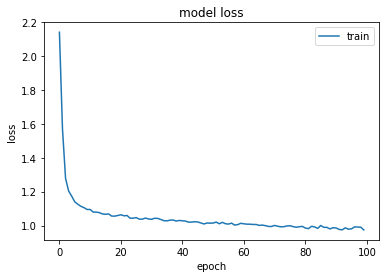

In [12]:
###################     White_wine  #######################################
classifier = Sequential()
# First Hidden Layer
classifier.add(Dense(32,activation='relu',kernel_initializer='random_normal',input_dim=11))
classifier.add(Dropout(0.1))

#outputlayer
classifier.add(Dense(10, activation='softmax', kernel_initializer='random_normal'))

classifier.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

classifier.summary()
history=classifier.fit(x_train ,y_train, batch_size= 20, epochs=100)

#테스트 셋에 대한 정확도 기록
eval_model=classifier.evaluate(x_train, y_train)
print(eval_model)

#트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()
#eval_model = classifier.evaluate( x_train, y_train)
#########################   white wine   ##################################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 714
Trainable params: 714
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
479/479 [==============================] - 0s 677us/step - loss: 2.2563 - acc: 0.3737
Epoch 2/100
479/479 [==============================] - 0s 48us/step - loss: 2.1265 - acc: 0.5344
Epoch 3/100
479/479 [==============================] - 0s 52us/step - loss: 1.9233 - acc: 0.5532
Epoch 4/100
479/479 [==============================] - 0s 42us/step - loss: 1.6644 - acc: 0.5553
Epoch 5/100
479/479 [==============================] - 0s 46us/step - loss: 1.4130 - acc: 0.5595
Epoch 6/100
479/479 [==============================] -

479/479 [==============================] - 0s 40us/step - loss: 0.7943 - acc: 0.6472
Epoch 79/100
479/479 [==============================] - 0s 42us/step - loss: 0.7928 - acc: 0.6514
Epoch 80/100
479/479 [==============================] - 0s 52us/step - loss: 0.7922 - acc: 0.6514
Epoch 81/100
479/479 [==============================] - 0s 45us/step - loss: 0.7906 - acc: 0.6472
Epoch 82/100
479/479 [==============================] - 0s 40us/step - loss: 0.7903 - acc: 0.6493
Epoch 83/100
479/479 [==============================] - 0s 40us/step - loss: 0.7885 - acc: 0.6493
Epoch 84/100
479/479 [==============================] - 0s 40us/step - loss: 0.7855 - acc: 0.6534
Epoch 85/100
479/479 [==============================] - 0s 44us/step - loss: 0.7853 - acc: 0.6534
Epoch 86/100
479/479 [==============================] - 0s 48us/step - loss: 0.7840 - acc: 0.6514
Epoch 87/100
479/479 [==============================] - 0s 44us/step - loss: 0.7818 - acc: 0.6576
Epoch 88/100
479/479 [===========

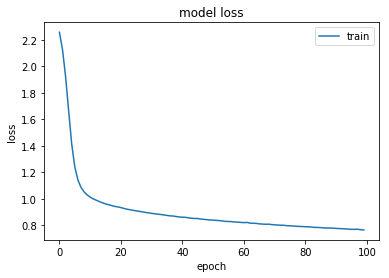

In [13]:
###################     Red_wine  #######################################
classifier = Sequential()
# First Hidden Layer
classifier.add(Dense(32,activation='relu',kernel_initializer='random_normal',input_dim=11))
#classifier.add(Dropout(0.1))

#outputlayer
classifier.add(Dense(10, activation='softmax', kernel_initializer='random_normal'))

classifier.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

classifier.summary()
history=classifier.fit(x2_train ,y2_train, batch_size= 20, epochs=100)

#테스트 셋에 대한 정확도 기록
eval_model=classifier.evaluate(x2_train, y2_train)
print(eval_model)

#트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()
#eval_model = classifier.evaluate( x_train, y_train)
##########################     Red_wine    #################################

### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

In [14]:
from sklearn.preprocessing import StandardScaler
## e.g ) = red_wine
## e.g ) t_r 는 range in 0 1
from sklearn.preprocessing import normalize
################################################
def generate_data2(df, t_r):

    
    Y = df.quality #red wine의 quality attr만
    #print(X)

    X= df.drop('quality',axis=1)
    #display(Y)
   
    X = normalize(X)  #Scaling 해준다.
    X_train ,X_test, Y_train,Y_test = train_test_split(X, Y, test_size = t_r)



    return X_train, Y_train, X_test, Y_test
   # return X_train.values, Y_train, X_test.values, Y_test
#####################################################

x_train, y_train, x_test, y_test = generate_data2(white_wine,0.7)
x2_train,y2_train,x2_test,y2_test = generate_data2(red_wine, 0.7)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 40)                480       
_________________________________________________________________
dense_30 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_31 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_32 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_33 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                410       
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

1469/1469 [==============================] - 0s 26us/step - loss: 0.9285 - acc: 0.6113
Epoch 72/1000
1469/1469 [==============================] - 0s 25us/step - loss: 0.9248 - acc: 0.6120
Epoch 73/1000
1469/1469 [==============================] - 0s 30us/step - loss: 0.9281 - acc: 0.5997
Epoch 74/1000
1469/1469 [==============================] - 0s 25us/step - loss: 0.9329 - acc: 0.6099
Epoch 75/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.9463 - acc: 0.5997
Epoch 76/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.9162 - acc: 0.6147
Epoch 77/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.9249 - acc: 0.6011
Epoch 78/1000
1469/1469 [==============================] - 0s 25us/step - loss: 0.9168 - acc: 0.6161
Epoch 79/1000
1469/1469 [==============================] - 0s 28us/step - loss: 0.9103 - acc: 0.6161
Epoch 80/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.9108 - acc: 0.6167
Epoc

1469/1469 [==============================] - 0s 24us/step - loss: 0.7786 - acc: 0.6773
Epoch 152/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.7944 - acc: 0.6664
Epoch 153/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.7856 - acc: 0.6692
Epoch 154/1000
1469/1469 [==============================] - 0s 37us/step - loss: 0.7647 - acc: 0.6712
Epoch 155/1000
1469/1469 [==============================] - 0s 35us/step - loss: 0.7699 - acc: 0.6780
Epoch 156/1000
1469/1469 [==============================] - 0s 32us/step - loss: 0.7571 - acc: 0.6991
Epoch 157/1000
1469/1469 [==============================] - 0s 34us/step - loss: 0.7665 - acc: 0.6787
Epoch 158/1000
1469/1469 [==============================] - 0s 29us/step - loss: 0.7642 - acc: 0.6964
Epoch 159/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.7684 - acc: 0.6909
Epoch 160/1000
1469/1469 [==============================] - 0s 28us/step - loss: 0.7576 - acc: 0.

1469/1469 [==============================] - 0s 24us/step - loss: 0.6688 - acc: 0.7318
Epoch 232/1000
1469/1469 [==============================] - 0s 28us/step - loss: 0.6644 - acc: 0.7332
Epoch 233/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.6599 - acc: 0.7277
Epoch 234/1000
1469/1469 [==============================] - 0s 24us/step - loss: 0.6505 - acc: 0.7440
Epoch 235/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.6538 - acc: 0.7406
Epoch 236/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.6618 - acc: 0.7277
Epoch 237/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.6603 - acc: 0.7386
Epoch 238/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.6561 - acc: 0.7379
Epoch 239/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.6450 - acc: 0.7488
Epoch 240/1000
1469/1469 [==============================] - 0s 25us/step - loss: 0.6615 - acc: 0.

1469/1469 [==============================] - 0s 26us/step - loss: 0.5501 - acc: 0.7910
Epoch 312/1000
1469/1469 [==============================] - 0s 25us/step - loss: 0.5661 - acc: 0.7876
Epoch 313/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.5441 - acc: 0.7924
Epoch 314/1000
1469/1469 [==============================] - 0s 24us/step - loss: 0.5366 - acc: 0.7985
Epoch 315/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.5642 - acc: 0.7897
Epoch 316/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.5456 - acc: 0.7965
Epoch 317/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.5337 - acc: 0.7999
Epoch 318/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.5766 - acc: 0.7781
Epoch 319/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.5596 - acc: 0.7828
Epoch 320/1000
1469/1469 [==============================] - 0s 25us/step - loss: 0.5390 - acc: 0.

1469/1469 [==============================] - 0s 26us/step - loss: 0.4527 - acc: 0.8339
Epoch 392/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.4618 - acc: 0.8257
Epoch 393/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.4833 - acc: 0.8189
Epoch 394/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.4986 - acc: 0.8033
Epoch 395/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.4785 - acc: 0.8142
Epoch 396/1000
1469/1469 [==============================] - 0s 28us/step - loss: 0.4614 - acc: 0.8271
Epoch 397/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.4972 - acc: 0.8053
Epoch 398/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.4666 - acc: 0.8291
Epoch 399/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.4456 - acc: 0.8319
Epoch 400/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.4346 - acc: 0.

1469/1469 [==============================] - 0s 32us/step - loss: 0.3825 - acc: 0.8577
Epoch 472/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.4211 - acc: 0.8264
Epoch 473/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.4051 - acc: 0.8475
Epoch 474/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.3909 - acc: 0.8550
Epoch 475/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.4219 - acc: 0.8312
Epoch 476/1000
1469/1469 [==============================] - 0s 29us/step - loss: 0.4134 - acc: 0.8441
Epoch 477/1000
1469/1469 [==============================] - 0s 28us/step - loss: 0.3773 - acc: 0.8564
Epoch 478/1000
1469/1469 [==============================] - 0s 28us/step - loss: 0.3708 - acc: 0.8604
Epoch 479/1000
1469/1469 [==============================] - 0s 25us/step - loss: 0.3702 - acc: 0.8625
Epoch 480/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.4000 - acc: 0.

1469/1469 [==============================] - 0s 25us/step - loss: 0.3038 - acc: 0.8931
Epoch 552/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.3464 - acc: 0.8645
Epoch 553/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.3860 - acc: 0.8509
Epoch 554/1000
1469/1469 [==============================] - 0s 32us/step - loss: 0.3401 - acc: 0.8659
Epoch 555/1000
1469/1469 [==============================] - 0s 29us/step - loss: 0.3099 - acc: 0.8870
Epoch 556/1000
1469/1469 [==============================] - 0s 29us/step - loss: 0.3163 - acc: 0.8802
Epoch 557/1000
1469/1469 [==============================] - 0s 29us/step - loss: 0.3439 - acc: 0.8679
Epoch 558/1000
1469/1469 [==============================] - 0s 29us/step - loss: 0.4048 - acc: 0.8428
Epoch 559/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.3850 - acc: 0.8632
Epoch 560/1000
1469/1469 [==============================] - 0s 30us/step - loss: 0.4139 - acc: 0.

1469/1469 [==============================] - 0s 28us/step - loss: 0.2944 - acc: 0.8897
Epoch 632/1000
1469/1469 [==============================] - 0s 24us/step - loss: 0.2954 - acc: 0.8897
Epoch 633/1000
1469/1469 [==============================] - 0s 26us/step - loss: 0.3037 - acc: 0.8897
Epoch 634/1000
1469/1469 [==============================] - 0s 28us/step - loss: 0.2842 - acc: 0.8938
Epoch 635/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.2840 - acc: 0.8931
Epoch 636/1000
1469/1469 [==============================] - 0s 29us/step - loss: 0.2740 - acc: 0.8945
Epoch 637/1000
1469/1469 [==============================] - 0s 30us/step - loss: 0.2801 - acc: 0.8958
Epoch 638/1000
1469/1469 [==============================] - 0s 28us/step - loss: 0.2959 - acc: 0.8829
Epoch 639/1000
1469/1469 [==============================] - 0s 27us/step - loss: 0.2835 - acc: 0.8993
Epoch 640/1000
1469/1469 [==============================] - 0s 33us/step - loss: 0.3004 - acc: 0.

1469/1469 [==============================] - 0s 31us/step - loss: 0.3538 - acc: 0.8666
Epoch 712/1000
1469/1469 [==============================] - 0s 33us/step - loss: 0.2844 - acc: 0.8884
Epoch 713/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.2612 - acc: 0.8999
Epoch 714/1000
1469/1469 [==============================] - 0s 34us/step - loss: 0.2613 - acc: 0.8986
Epoch 715/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.2466 - acc: 0.9081
Epoch 716/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.2589 - acc: 0.8924
Epoch 717/1000
1469/1469 [==============================] - 0s 35us/step - loss: 0.2288 - acc: 0.9183
Epoch 718/1000
1469/1469 [==============================] - 0s 33us/step - loss: 0.2160 - acc: 0.9190
Epoch 719/1000
1469/1469 [==============================] - 0s 33us/step - loss: 0.2165 - acc: 0.9238
Epoch 720/1000
1469/1469 [==============================] - 0s 32us/step - loss: 0.2151 - acc: 0.

1469/1469 [==============================] - 0s 31us/step - loss: 0.3391 - acc: 0.8679
Epoch 792/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.2581 - acc: 0.9027
Epoch 793/1000
1469/1469 [==============================] - 0s 36us/step - loss: 0.2281 - acc: 0.9101
Epoch 794/1000
1469/1469 [==============================] - 0s 33us/step - loss: 0.2126 - acc: 0.9231
Epoch 795/1000
1469/1469 [==============================] - 0s 35us/step - loss: 0.2404 - acc: 0.9054
Epoch 796/1000
1469/1469 [==============================] - 0s 33us/step - loss: 0.2068 - acc: 0.9238
Epoch 797/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.2137 - acc: 0.9190
Epoch 798/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.2142 - acc: 0.9204
Epoch 799/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.2214 - acc: 0.9142
Epoch 800/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.1930 - acc: 0.

1469/1469 [==============================] - 0s 31us/step - loss: 0.1503 - acc: 0.9483
Epoch 872/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.1509 - acc: 0.9503
Epoch 873/1000
1469/1469 [==============================] - 0s 29us/step - loss: 0.2040 - acc: 0.9231
Epoch 874/1000
1469/1469 [==============================] - 0s 33us/step - loss: 0.2516 - acc: 0.9108
Epoch 875/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.3546 - acc: 0.8747
Epoch 876/1000
1469/1469 [==============================] - 0s 32us/step - loss: 0.3977 - acc: 0.8414
Epoch 877/1000
1469/1469 [==============================] - 0s 32us/step - loss: 0.3106 - acc: 0.8924
Epoch 878/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.3147 - acc: 0.8918
Epoch 879/1000
1469/1469 [==============================] - 0s 32us/step - loss: 0.3291 - acc: 0.8713
Epoch 880/1000
1469/1469 [==============================] - 0s 34us/step - loss: 0.3102 - acc: 0.

1469/1469 [==============================] - 0s 31us/step - loss: 0.1154 - acc: 0.9687
Epoch 952/1000
1469/1469 [==============================] - 0s 32us/step - loss: 0.1097 - acc: 0.9714
Epoch 953/1000
1469/1469 [==============================] - 0s 32us/step - loss: 0.1254 - acc: 0.9598
Epoch 954/1000
1469/1469 [==============================] - 0s 30us/step - loss: 0.1432 - acc: 0.9476
Epoch 955/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.2392 - acc: 0.9149
Epoch 956/1000
1469/1469 [==============================] - 0s 32us/step - loss: 0.5963 - acc: 0.8210
Epoch 957/1000
1469/1469 [==============================] - 0s 29us/step - loss: 0.4657 - acc: 0.8489
Epoch 958/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.2712 - acc: 0.9020
Epoch 959/1000
1469/1469 [==============================] - 0s 31us/step - loss: 0.1852 - acc: 0.9326
Epoch 960/1000
1469/1469 [==============================] - 0s 30us/step - loss: 0.1502 - acc: 0.

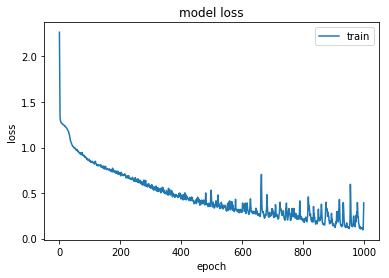

In [21]:

######################   White_wine  ####################################
classifier2 = Sequential()
# First Hidden Layer
classifier2.add(Dense(40,activation='relu',kernel_initializer='random_normal',input_dim=11))
#classifier2.add(Dropout(0.2))
#Second Hidden Layer
classifier2.add(Dense(30, activation='relu', kernel_initializer='random_normal'))
#classifier2.add(Dropout(0.2))
#Third
classifier2.add(Dense(20, activation='relu', kernel_initializer='random_normal'))

classifier2.add(Dense(30, activation='relu', kernel_initializer='random_normal'))

classifier2.add(Dense(40, activation='relu', kernel_initializer='random_normal'))

#classifier2.add(Dropout(0.2))
#Forth
#classifier2.add(Dense(11, activation='relu', kernel_initializer='random_normal'))

#outputlayer
classifier2.add(Dense(10, activation='softmax', kernel_initializer='random_normal'))

classifier2.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

classifier2.summary()
history =classifier2.fit(x_train ,y_train, batch_size= 50, epochs=1000)


results = classifier2.evaluate(x_train,y_train)
print(results)

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()
#eval_model = classifier.evaluate( x_train, y_train)
###########################################################


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 40)                480       
_________________________________________________________________
dense_24 (Dense)             (None, 30)                1230      
_________________________________________________________________
dense_25 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_26 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_27 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                410       
Total params: 4,610
Trainable params: 4,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/

479/479 [==============================] - 0s 27us/step - loss: 0.9475 - acc: 0.6054
Epoch 74/100
479/479 [==============================] - 0s 27us/step - loss: 0.9343 - acc: 0.6367
Epoch 75/100
479/479 [==============================] - 0s 25us/step - loss: 0.9316 - acc: 0.6305
Epoch 76/100
479/479 [==============================] - 0s 35us/step - loss: 0.9246 - acc: 0.6200
Epoch 77/100
479/479 [==============================] - 0s 27us/step - loss: 0.9204 - acc: 0.6221
Epoch 78/100
479/479 [==============================] - 0s 29us/step - loss: 0.9136 - acc: 0.6305
Epoch 79/100
479/479 [==============================] - 0s 27us/step - loss: 0.9057 - acc: 0.6263
Epoch 80/100
479/479 [==============================] - 0s 25us/step - loss: 0.8999 - acc: 0.6388
Epoch 81/100
479/479 [==============================] - 0s 29us/step - loss: 0.8954 - acc: 0.6242
Epoch 82/100
479/479 [==============================] - 0s 32us/step - loss: 0.8894 - acc: 0.6430
Epoch 83/100
479/479 [===========

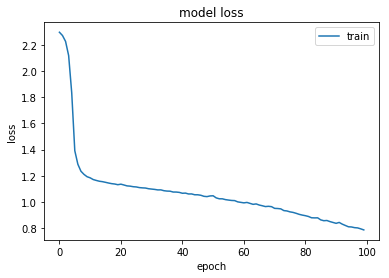

In [20]:

######################   Red_wine  ####################################
classifier2 = Sequential()
# First Hidden Layer
classifier2.add(Dense(40,activation='relu',kernel_initializer='random_normal',input_dim=11))
#classifier2.add(Dropout(0.2))
#Second Hidden Layer
classifier2.add(Dense(30, activation='relu', kernel_initializer='random_normal'))
#classifier2.add(Dropout(0.2))
#Third
classifier2.add(Dense(20, activation='relu', kernel_initializer='random_normal'))

classifier2.add(Dense(30, activation='relu', kernel_initializer='random_normal'))

classifier2.add(Dense(40, activation='relu', kernel_initializer='random_normal'))
#Forth
#classifier2.add(Dense(11, activation='relu', kernel_initializer='random_normal'))

#outputlayer
classifier2.add(Dense(10, activation='softmax', kernel_initializer='random_normal'))

classifier2.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

classifier2.summary()
history =classifier2.fit(x2_train ,y2_train, batch_size= 50, epochs=100)


results = classifier2.evaluate(x2_train,y2_train)
print(results)

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()
#eval_model = classifier.evaluate( x_train, y_train)
###########################################################


### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


In [ ]:
##########################################################
all_wine = pd.concat([red_wine,white_wine])
x3_train,y3_train,x3_test,y3_test = generate_data(all_wine, 0.7)

classifier2 = Sequential()
# First Hidden Layer
classifier2.add(Dense(40,activation='relu',kernel_initializer='random_normal',input_dim=11))
#Second Hidden Layer
classifier2.add(Dense(30, activation='relu', kernel_initializer='random_normal'))
#Third
classifier2.add(Dense(20, activation='relu', kernel_initializer='random_normal'))
#Forth
#classifier2.add(Dense(11, activation='relu', kernel_initializer='random_normal'))

#outputlayer
classifier2.add(Dense(10, activation='softmax', kernel_initializer='random_normal'))

classifier2.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])

classifier2.summary()
history =classifier2.fit(x3_train ,y3_train, batch_size= 50, epochs=100)


results = classifier2.evaluate(x3_train,y3_train)
print(results)

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()
#eval_model = classifier.evaluate( x_train, y_train)
###########################################################

###########################################################